In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import cluster, datasets

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score, davies_bouldin_score

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE


In [2]:
df=pd.read_csv('zalando.csv').drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,sku,is_premium,price.original,almost,true_discount,tracking_discount,sponsored,10_extra,discount_flag,HOTDROP,...,new_color_black,new_color_blue,new_color_green,new_color_grey,new_color_navy,new_color_pink,new_color_red,new_color_rose,new_color_white,new_color_yellow
0,NI113D07E-A11,0,84.95,0,30.15,1,1,0,30,1,...,0,0,0,0,0,0,0,0,1,0
1,NI114D09A-Q13,0,149.95,1,35.15,1,1,1,35,0,...,0,0,0,1,0,0,0,0,0,0
2,NI114D09U-K11,0,139.95,0,30.15,1,1,1,30,0,...,0,1,0,0,0,0,0,0,0,0
3,AD116D0GW-A11,0,64.95,1,30.15,1,0,1,30,0,...,0,0,0,0,0,0,0,0,1,0
4,TO124G05S-Q11,1,14.95,0,20.15,1,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['sku', 'is_premium', 'price.original', 'almost', 'true_discount',
       'tracking_discount', 'sponsored', '10_extra', 'discount_flag',
       'HOTDROP', 'tracking_sustainable', 'new_category_baskets',
       'new_category_chaussures', 'new_category_jean', 'new_category_pantalon',
       'new_category_pyjama', 'new_category_robe', 'new_category_sandal',
       'new_category_shirt', 'new_category_short', 'new_category_sweatshirt',
       'new_category_t-shirt', 'new_category_veste',
       'product_group_beach_wear', 'product_group_clothing',
       'product_group_equipment', 'product_group_nightwear',
       'product_group_shoe', 'product_group_underwear', 'new_color_black',
       'new_color_blue', 'new_color_green', 'new_color_grey', 'new_color_navy',
       'new_color_pink', 'new_color_red', 'new_color_rose', 'new_color_white',
       'new_color_yellow'],
      dtype='object')

In [5]:
df.drop(['sku','new_category_baskets',
       'new_category_chaussures', 'new_category_jean', 'new_category_pantalon',
       'new_category_pyjama', 'new_category_robe', 'new_category_sandal',
       'new_category_shirt', 'new_category_short', 'new_category_sweatshirt',
       'new_category_t-shirt', 'new_category_veste','true_discount'],axis=1,inplace=True)

In [6]:
df.new_color_pink=(df.new_color_rose+df.new_color_pink).map({2:1,1:1,0:0})

In [7]:
df.drop('new_color_rose',axis=1,inplace=True)

In [8]:
df.columns

Index(['is_premium', 'price.original', 'almost', 'tracking_discount',
       'sponsored', '10_extra', 'discount_flag', 'HOTDROP',
       'tracking_sustainable', 'product_group_beach_wear',
       'product_group_clothing', 'product_group_equipment',
       'product_group_nightwear', 'product_group_shoe',
       'product_group_underwear', 'new_color_black', 'new_color_blue',
       'new_color_green', 'new_color_grey', 'new_color_navy', 'new_color_pink',
       'new_color_red', 'new_color_white', 'new_color_yellow'],
      dtype='object')

## X,y

In [9]:
y=df.discount_flag

In [10]:
X=df.drop(['price.original','almost','discount_flag','product_group_beach_wear', 
           'product_group_clothing','product_group_equipment', 'product_group_nightwear',
           'product_group_shoe', 'product_group_underwear','new_color_black','new_color_navy'],
          axis=1)

In [11]:
X.head()

,is_premium,tracking_discount,sponsored,10_extra,HOTDROP,tracking_sustainable,new_color_blue,new_color_green,new_color_grey,new_color_pink,new_color_red,new_color_white,new_color_yellow
0,0,1,1,0,1,0,0,0,0,0,0,1,0
1,0,1,1,1,0,0,0,0,1,0,0,0,0
2,0,1,1,1,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0


## Clusters

In [12]:
model=KMeans()

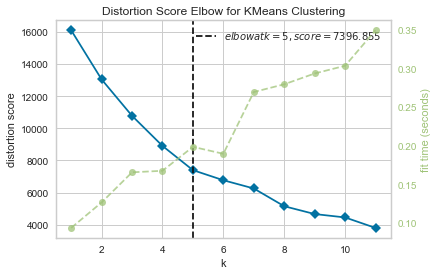

In [13]:
visualizer=KElbowVisualizer(model,k=(1,12))
visualizer.fit(X)
visualizer.poof();

# KMeans

In [14]:
kmeans=KMeans(5)

In [15]:
df_cluster=kmeans.fit(X)

In [16]:
df_cluster.cluster_centers_

array([[ 1.00000000e+00,  1.00000000e+00,  1.89193279e-17,
         8.78032569e-01,  6.44016090e-17,  2.85809239e-02,
         1.72814889e-01,  2.62545696e-02,  5.68295115e-02,
         7.04553008e-02,  6.31439016e-02,  1.39248920e-01,
         2.65869059e-02],
       [-2.52575738e-14,  9.99745223e-01,  3.82165605e-04,
         1.00000000e+00, -1.92554306e-16,  5.54140127e-02,
        -1.65145675e-14,  3.29936306e-02,  1.01146497e-01,
         1.23312102e-01,  6.00000000e-02, -1.64868119e-14,
         2.36942675e-02],
       [ 1.76491352e-03,  9.58348041e-01,  7.05965408e-04,
         7.15848923e-01,  1.41193082e-03,  5.01235439e-02,
         1.00000000e+00,  2.98372438e-16, -4.34374758e-15,
         1.66533454e-15, -2.30371278e-15, -8.18789481e-15,
        -6.80011603e-16],
       [ 7.91139241e-03,  8.01819620e-01,  3.95569620e-04,
         3.17523785e-14,  9.49367089e-03,  4.11392405e-02,
        -7.96585020e-15,  4.74683544e-02,  8.90031646e-02,
         1.13528481e-01,  6.56645570e

In [17]:
df_ml1=df.copy()

In [18]:
df_ml1['clusters']=df_cluster.labels_

In [19]:
df_ml1.clusters.value_counts()

1    7850
0    3009
2    2833
3    2528
4    1911
Name: clusters, dtype: int64

In [20]:
df_ml1.head()

,is_premium,price.original,almost,tracking_discount,sponsored,10_extra,discount_flag,HOTDROP,tracking_sustainable,product_group_beach_wear,...,new_color_black,new_color_blue,new_color_green,new_color_grey,new_color_navy,new_color_pink,new_color_red,new_color_white,new_color_yellow,clusters
0,0,84.95,0,1,1,0,30,1,0,0,...,0,0,0,0,0,0,0,1,0,3
1,0,149.95,1,1,1,1,35,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,139.95,0,1,1,1,30,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,64.95,1,1,0,1,30,0,0,0,...,0,0,0,0,0,0,0,1,0,4
4,1,14.95,0,1,0,1,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_ml1.groupby('clusters').mean().round(2).T

clusters,0,1,2,3,4
is_premium,1.00,0.00,0.00,0.01,0.00
price.original,62.90,35.61,34.96,40.22,38.13
almost,0.04,0.06,0.07,0.08,0.10
tracking_discount,1.00,1.00,0.96,0.80,1.00
sponsored,0.00,0.00,0.00,0.00,0.00
10_extra,0.88,1.00,0.72,0.00,1.00
discount_flag,33.46,31.73,28.99,21.34,29.95
HOTDROP,0.00,0.00,0.00,0.01,0.00
tracking_sustainable,0.03,0.06,0.05,0.04,0.04
product_group_beach_wear,0.06,0.02,0.02,0.02,0.01


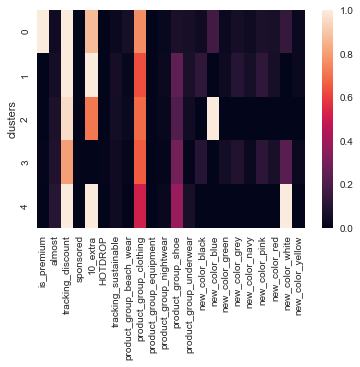

In [22]:
sns.heatmap(df_ml1.groupby('clusters').mean().drop({'price.original','discount_flag'},axis=1));


# 1. MinMaxScaler

In [23]:
# X_sc=X.copy()
# cols=X.columns
# for i in cols:
#     X_sc[i]=X_sc[i].apply(lambda x: (x-X_sc[i].min())/(X_sc[i].max()-X_sc[i].min()))

In [24]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
X_sc = pd.DataFrame(X_sc)

# Visualizer # clusters

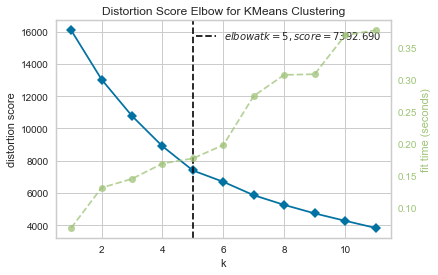

In [25]:
visualizer=KElbowVisualizer(model,k=(1,12))
visualizer.fit(X_sc)
visualizer.poof();

# Clusters

In [26]:
df_cluster2=kmeans.fit(X_sc)

In [27]:
df_cluster2.cluster_centers_

array([[-2.69506639e-14,  9.60745254e-01,  3.51535036e-04,
         8.06421373e-01,  5.85891727e-04,  5.53081790e-02,
        -1.68476344e-14,  4.44105929e-02,  1.19287556e-01,
         1.90125693e-15,  7.45254277e-02, -1.68753900e-14,
         2.98804781e-02],
       [ 1.56576200e-01,  9.64807635e-01,  5.96480763e-04,
         7.40530868e-01,  1.19296153e-03,  4.74202207e-02,
         1.00000000e+00, -6.27969898e-16, -5.85642645e-15,
         1.72084569e-15, -2.74780199e-15, -1.01862963e-14,
        -7.45931095e-16],
       [ 1.45194274e-01,  9.61826858e-01, -7.20994445e-18,
         7.89366053e-01, -1.23599048e-17,  3.61281527e-02,
         1.19348975e-15,  7.04297731e-16,  6.93889390e-17,
         1.00000000e+00,  3.60822483e-16,  1.41553436e-15,
        -2.77555756e-16],
       [ 1.45366862e-01,  9.66930761e-01,  3.44471237e-04,
         7.87116776e-01,  6.54495350e-03,  3.65139511e-02,
        -9.60342916e-15,  1.56125113e-16, -4.57966998e-15,
         1.66533454e-15, -2.37310172e

In [28]:
df_ml2=df.copy()
df_ml2['clusters']=df_cluster2.labels_

In [29]:
df_ml2.clusters.value_counts()

0    8534
1    3353
3    2903
4    1874
2    1467
Name: clusters, dtype: int64

In [30]:
df_ml2.groupby('clusters').mean().round(2).T

clusters,0,1,2,3,4
is_premium,0.00,0.16,0.15,0.15,1.00
price.original,36.46,39.34,39.63,42.42,62.97
almost,0.06,0.07,0.05,0.09,0.04
tracking_discount,0.96,0.96,0.96,0.97,0.99
sponsored,0.00,0.00,0.00,0.00,0.00
10_extra,0.81,0.74,0.79,0.79,0.87
discount_flag,29.66,29.56,30.22,28.85,33.50
HOTDROP,0.00,0.00,0.00,0.01,0.00
tracking_sustainable,0.06,0.05,0.04,0.04,0.02
product_group_beach_wear,0.02,0.03,0.04,0.01,0.06


sns.pairplot(df_ml,hue='clusters');

In [31]:
X_sc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,0.167338,0.965749,0.000331,0.795930,0.001544,0.046054,0.184932,0.025261,0.065633,0.080911,0.045612,0.160113,0.018477
std,0.373287,0.181878,0.018189,0.403032,0.039269,0.209607,0.388253,0.156920,0.247647,0.272706,0.208649,0.366720,0.134671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. PCA

In [32]:
pca=PCA(n_components=6)
pca=pca.fit(X_sc)

In [33]:
pca.explained_variance_ratio_.sum()

0.828371471045674

In [34]:
pca_df=pd.DataFrame(pca.transform(X_sc),columns=['pca1','pca2','pca3','pca4','pca5','pca6'])

In [35]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.214314,-0.129175,0.000382,-0.662256,0.003158,0.000619,0.616542,-0.001884,-0.029371,-0.035960,-0.012369,-0.341058,-0.005828
1,-0.317322,-0.131169,0.000112,-0.607093,0.007594,-0.008578,-0.509982,0.008663,0.010195,0.021033,0.007039,0.502648,0.000566
2,0.915555,-0.061056,-0.000302,-0.379282,0.001773,-0.037080,-0.101132,0.010343,-0.005686,-0.001055,0.047129,0.000002,0.014487
3,0.103140,0.035230,0.000187,0.094690,0.004006,-0.014083,0.522298,-0.045344,-0.196123,-0.331522,-0.098628,0.738336,-0.029166
4,0.021541,0.005500,-0.000442,0.014477,0.000454,-0.039457,0.115231,-0.036154,-0.522532,0.825683,-0.108316,0.126965,-0.022570
5,0.046343,0.013324,0.000558,-0.000707,0.000685,-0.080850,0.158216,-0.092381,0.755802,0.357007,-0.476858,0.169075,-0.053855


In [36]:
pca2=PCA(n_components=6)
pca2=pca.fit(X)

In [37]:
pca2.explained_variance_ratio_.sum()

0.8283714710456733

In [38]:
pca_df2=pd.DataFrame(pca2.transform(X),columns=['pca1','pca2','pca3','pca4','pca5','pca6'])

In [39]:
pd.DataFrame(pca2.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.214314,-0.129175,0.000382,-0.662256,0.003158,0.000619,0.616542,-0.001884,-0.029371,-0.035960,-0.012369,-0.341058,-0.005828
1,-0.317322,-0.131169,0.000112,-0.607093,0.007594,-0.008578,-0.509982,0.008663,0.010195,0.021033,0.007039,0.502648,0.000566
2,0.915555,-0.061056,-0.000302,-0.379282,0.001773,-0.037080,-0.101132,0.010343,-0.005686,-0.001055,0.047129,0.000002,0.014487
3,0.103140,0.035230,0.000187,0.094690,0.004006,-0.014083,0.522298,-0.045344,-0.196123,-0.331522,-0.098628,0.738336,-0.029166
4,0.021541,0.005500,-0.000442,0.014477,0.000454,-0.039457,0.115231,-0.036154,-0.522532,0.825683,-0.108316,0.126965,-0.022570
5,0.046343,0.013324,0.000558,-0.000707,0.000685,-0.080850,0.158216,-0.092381,0.755802,0.357007,-0.476858,0.169075,-0.053855


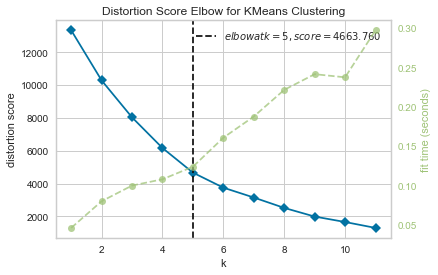

In [40]:
visualizer=KElbowVisualizer(model,k=(1,12))
visualizer.fit(pca_df)
visualizer.poof();

In [41]:
df_cluster3=kmeans.fit(pca_df)

In [42]:
df_ml3=df.copy()

In [43]:
df_ml3['clusters']=df_cluster3.labels_

In [44]:
df_ml3.clusters.value_counts()

0    7850
2    3009
3    2833
1    2528
4    1911
Name: clusters, dtype: int64

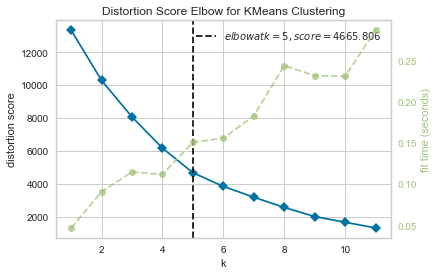

In [45]:
visualizer=KElbowVisualizer(model,k=(1,12))
visualizer.fit(pca_df2)
visualizer.poof();

In [46]:
df_cluster4=kmeans.fit(pca_df2)

In [47]:
df_ml4=df.copy()

In [48]:
df_ml4['clusters']=df_cluster4.labels_

In [49]:
df_ml4.clusters.value_counts()

4    7850
0    2903
1    2828
3    2595
2    1955
Name: clusters, dtype: int64

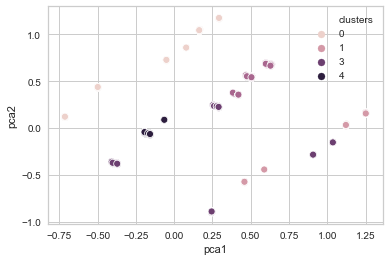

In [50]:
sns.scatterplot(x='pca1',y='pca2',data=pca_df2,hue=df_ml4.clusters);

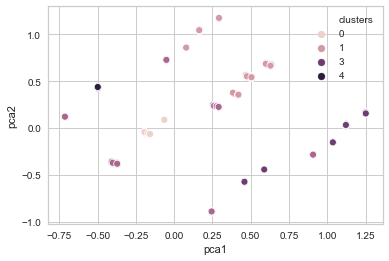

In [51]:
sns.scatterplot(x='pca1',y='pca2',data=pca_df,hue=df_ml3.clusters);

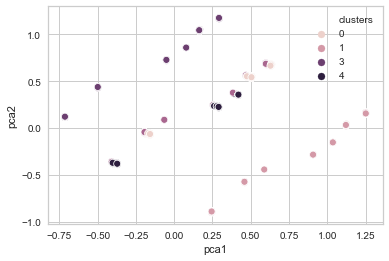

In [52]:
sns.scatterplot(x='pca1',y='pca2',data=pca_df,hue=df_ml2.clusters);

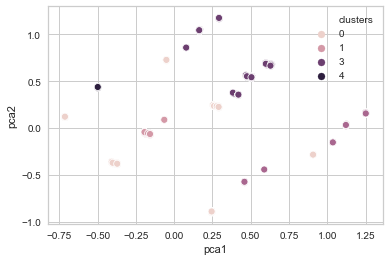

In [53]:
sns.scatterplot(x='pca1',y='pca2',data=pca_df2,hue=df_ml1.clusters);

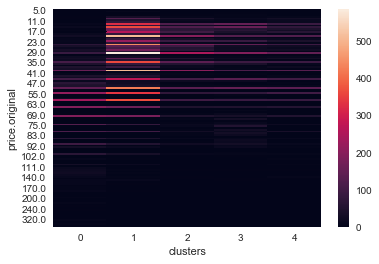

In [54]:
sns.heatmap(pd.crosstab(round(df_ml1['price.original']),df_ml1.clusters));

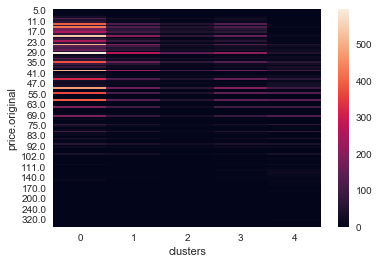

In [55]:
sns.heatmap(pd.crosstab(round(df_ml2['price.original']),df_ml2.clusters));

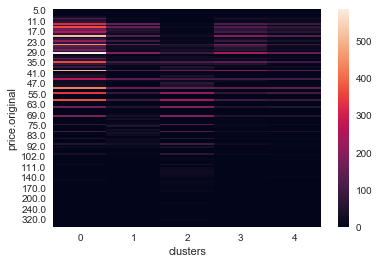

In [56]:
sns.heatmap(pd.crosstab(round(df_ml3['price.original']),df_ml3.clusters));

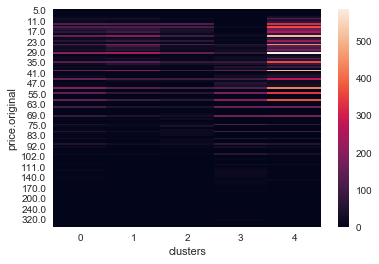

In [57]:
sns.heatmap(pd.crosstab(round(df_ml3['price.original']),df_ml4.clusters));

In [58]:
5

5

In [59]:
print(silhouette_score(X, df_ml1.clusters))
davies_bouldin_score(X, df_ml1.clusters)

0.4650402994703042


1.031776855306092

In [60]:
print(silhouette_score(X_sc, df_ml2.clusters))
davies_bouldin_score(X_sc, df_ml2.clusters)

0.4748827221569957


1.0821726216234027

In [61]:
print(silhouette_score(pca_df,df_ml3.clusters))
davies_bouldin_score(pca_df, df_ml3.clusters)

0.5739117380704839


0.780026083261606

In [62]:
print(silhouette_score(pca_df2,df_ml4.clusters))
davies_bouldin_score(pca_df2, df_ml4.clusters)

0.5766549805114289


0.7783553404159534

In [63]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)


In [64]:
# range_n_clusters = [2, 3, 4, 5, 6,7,8]

# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
#     davies_avg = davies_bouldin_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", davies_avg)


# Data

In [65]:
df=pd.get_dummies(data=df_ml1,columns=['clusters'],drop_first=True)

In [66]:
df.almost.value_counts()

0    16941
1     1190
Name: almost, dtype: int64

# Splitting Data

In [67]:
X=df[df.almost==0].drop(['almost','discount_flag'],axis=1)
X_2=df[df.almost==1].drop(['almost','discount_flag'],axis=1)
y=df.discount_flag[df.almost==0]
y_2=df.discount_flag[df.almost==1]

# Standard Scaler

In [68]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
X2=pd.DataFrame(scaler.transform(X),columns=X.columns)

In [70]:
scaler=StandardScaler()
scaler.fit(X_2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
X2_2=pd.DataFrame(scaler.transform(X_2),columns=X_2.columns)

# Linear Regression

In [72]:
model0=LinearRegression().fit(X,y**(1/3))

In [73]:
y_pred0=model0.predict(X)

In [74]:
mse=mean_squared_error(y**(1/3),y_pred0)
rmse=mse**0.5
rmse

0.3687264780259511

In [75]:
scoretest=r2_score(y**(1/3),y_pred0)
scoretest

0.7219891747979346

# OLS Original Model

In [76]:
model1=OLS(y,add_constant(X))
result1=model1.fit()
result1.summary()

C:\Users\mathi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          discount_flag   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     255.3
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:14:04   Log-Likelihood:                -64921.
No. Observations:               16941   AIC:                         1.299e+05
Df Residuals:                   16914   BIC:                         1.301e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.7146      2.562     -2.620      0.009     -11.737      -1.692
is_premium                  -1.7206      2.285     -0.753      0.452      -6.200       2.759
price.original               0.0984      0.004     26.460      0.000       0.091       0.106
tracking_discount           25.1445      0.513     49.039      0.000      24.139      26.150
sponsored                   -5.7041      5.093     -1.120      0.263     -15.687       4.278
10_extra                     8.9079      0.395     22.575      0.000       8.134       9.681
HOTDROP                      3.5852      2.345      1.529      0.126      -1.010       8.181
tracking_sustainable         1.7909      0.410      4.367      0.000       0.987       2.595
product_group_beach_wear    -0.4613      0.886     -0.521      0.603      -2.199       1.276
product_group_clothing       3.2561      0.704      4.625      0.000       1.876       4.636
product_group_equipment     12.9907      7.941      1.636      0.102      -2.575      28.556
product_group_nightwear      0.0290      0.905      0.032      0.974      -1.745       1.803
product_group_shoe          -1.1681      0.732     -1.597      0.110      -2.602       0.266
product_group_underwear      0.2361      0.781      0.302      0.762      -1.294       1.766
new_color_black             -0.0043      0.361     -0.012      0.990      -0.712       0.704
new_color_blue              -0.4682      0.568     -0.824      0.410      -1.582       0.646
new_color_green              2.2703      0.562      4.036      0.000       1.168       3.373
new_color_grey               0.3762      0.368      1.023      0.306      -0.345       1.097
new_color_navy               0.6366      0.467      1.363      0.173      -0.279       1.552
new_color_pink               0.9049      0.337      2.683      0.007       0.244       1.566
new_color_red                1.1487      0.431      2.668      0.008       0.305       1.993
new_color_white              0.0010      0.431      0.002      0.998      -0.844       0.846
new_color_yellow             0.2441      0.640      0.381      0.703      -1.011       1.499
clusters_1                  -1.3787      2.301     -0.599      0.549      -5.888       3.131
clusters_2                  -0.0265      2.349     -0.011      0.991      -4.631       4.578
clusters_3                   1.4370      2.334      0.616      0.538      -3.138       6.012
clusters_4                  -2.5492      2.335     -1.092      0.275      -7.126       2.028
==============================================================================
Omnibus:                     1203.609   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1476.910
Skew:                           0.720   Prob(JB):       

In [77]:
X1=X.drop(['new_color_black','new_color_white','product_group_nightwear',
           'product_group_underwear','new_color_yellow','new_color_grey',
           'product_group_beach_wear','sponsored','new_color_navy','new_color_blue',
           'HOTDROP','product_group_equipment','clusters_4','product_group_shoe','clusters_3'],axis=1)

In [78]:
X1=add_constant(X1)
model1=OLS(y**(1/4),X1)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          discount_flag   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     6845.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:14:04   Log-Likelihood:                 2405.3
No. Observations:               16941   AIC:                            -4787.
Df Residuals:                   16929   BIC:                            -4694.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1176      0.009    -12.721      0.000      -0.136      -0.099
is_premium                -0.0161      0.006     -2.720      0.007      -0.028      -0.004
price.original             0.0018   6.43e-05     27.329      0.000       0.002       0.002
tracking_discount          2.2101      0.009    235.436      0.000       2.192       2.228
10_extra                   0.1312      0.005     25.090      0.000       0.121       0.141
tracking_sustainable       0.0386      0.008      5.022      0.000       0.024       0.054
product_group_clothing     0.0724      0.004     20.626      0.000       0.066       0.079
new_color_green            0.0465      0.010      4.493      0.000       0.026       0.067
new_color_pink             0.0193      0.006      3.222      0.001       0.008       0.031
new_color_red              0.0269      0.008      3.441      0.001       0.012       0.042
clusters_1                 0.0018      0.005      0.363      0.716      -0.008       0.012
clusters_2                 0.0087      0.006      1.585      0.113      -0.002       0.019
==============================================================================
Omnibus:                     1086.952   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4777.296
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       5.587   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ridge

best alpha is 1.0
best score is 0.27833618831748863


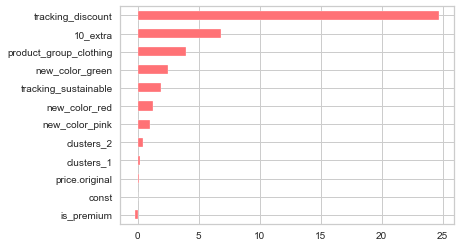

In [79]:
reg=RidgeCV()
reg.fit(X1,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X1,y)}')
coef=pd.Series(reg.coef_,index=X1.columns)
coef.sort_values().plot.barh(color='#ff7276');

best alpha is 10.0
best score is 0.2818297451265942


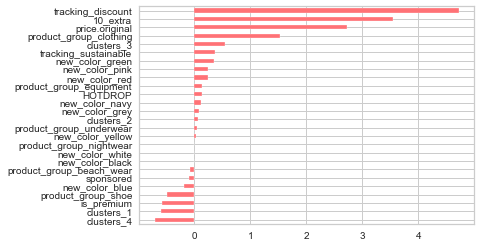

In [80]:
reg=RidgeCV()
reg.fit(X2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X2,y)}')
coef=pd.Series(reg.coef_,index=X2.columns)
coef.sort_values().plot.barh(color='#ff7276');

# Lasso

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha is 0.0697567968567989
best score is 0.2751079196538756


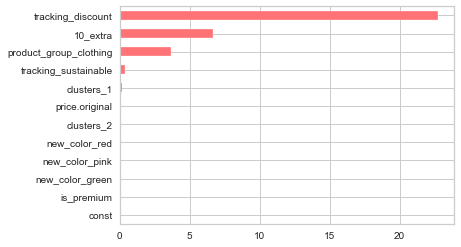

In [81]:
reg=LassoCV()
reg.fit(X1,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X1,y)}')
coef=pd.Series(reg.coef_,index=X1.columns)
coef.sort_values().plot.barh(color='#ff7276');

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha is 0.0058102495707598265
best score is 0.28180432469478556


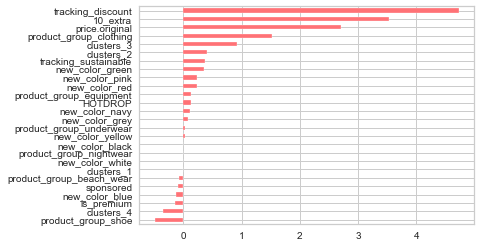

In [82]:
reg=LassoCV()
reg.fit(X2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X2,y)}')
coef=pd.Series(reg.coef_,index=X2.columns)
coef.sort_values().plot.barh(color='#ff7276');

# Elastic Net

In [83]:
reg=ElasticNetCV()
reg.fit(X,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X,y)}')

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha is 0.13951359371359784
best score is 0.21477598658823452


In [84]:
reg=ElasticNetCV()
reg.fit(X2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(X2,y)}')

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha is 0.011620499141519655
best score is 0.2817674163572954


# Linear Prediction

In [85]:
pred0=model0.predict(X_2)

In [86]:
comp=pd.DataFrame(pred0**3,y_2).reset_index()
comp['diff']=comp.discount_flag-comp[0]

In [87]:
comp.describe()

,discount_flag,0,diff
count,1190.000000,1190.000000,1190.000000
mean,32.332773,29.183582,3.149192
std,11.400877,3.402479,11.133983
min,5.000000,18.510400,-30.041441
25%,25.000000,26.768890,-4.980805
50%,30.000000,29.551863,1.840535
75%,40.000000,31.431138,9.763058
max,72.000000,50.041441,44.351838


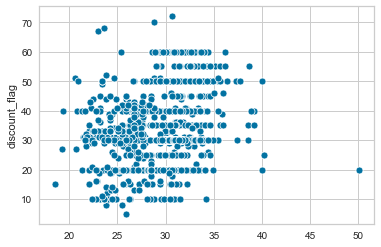

In [88]:
sns.scatterplot(pred0**3,y_2);

In [89]:
comp[comp['diff']<0].shape

(506, 3)

# OLS prediction

In [90]:
pred1 = result1.predict(X1)

In [91]:
comp1=pd.DataFrame(pred1**4,y_2).reset_index()
comp1['diff']=comp.discount_flag-comp[0]

In [92]:
comp1.describe()

,discount_flag,0,diff
count,1190.000000,977.000000,1190.000000
mean,32.332773,30.985592,3.149192
std,11.400877,3.230710,11.133983
min,5.000000,21.234697,-30.041441
25%,25.000000,29.358460,-4.980805
50%,30.000000,30.326204,1.840535
75%,40.000000,34.342806,9.763058
max,72.000000,38.369490,44.351838


# Elastic Net Prediction

In [93]:
reg=ElasticNetCV().fit(X2,y)
model1=ElasticNet(alpha=reg.alpha_).fit(X2,(y**(1/3)))

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [94]:
model1.score(X2,(y**(1/3)))

0.720028228227195

In [95]:
y_test_pred1=model1.predict(X2_2)
y_test_pred1

array([3.32494343, 3.00466734, 2.78923058, ..., 2.84384162, 2.77396499,
       2.77396499])

In [96]:
comp1=pd.DataFrame(y_test_pred1**3,y_2).reset_index()
comp1['diff']=comp1.discount_flag-comp1[0]

In [97]:
comp1.describe()

,discount_flag,0,diff
count,1190.000000,1190.000000,1190.000000
mean,32.332773,26.426600,5.906173
std,11.400877,2.894394,11.152158
min,5.000000,18.285199,-26.944862
25%,25.000000,24.379978,-2.470348
50%,30.000000,26.794360,4.271326
75%,40.000000,28.099573,12.671156
max,72.000000,46.944862,45.586735


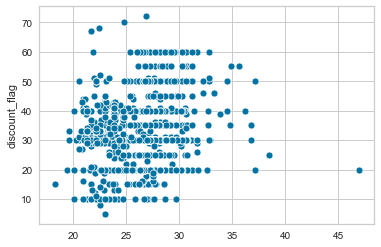

In [98]:
sns.scatterplot(y_test_pred1**3,y_2);

In [99]:
comp1[comp1['diff']<0].shape

(354, 3)

# Lasso Prediction

In [100]:
reg=LassoCV().fit(X2,y**(1/3))
model2=Lasso(alpha=reg.alpha_).fit(X2,y**(1/3))

C:\Users\mathi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [101]:
model2.score(X2,y**(1/3))

0.721944393976748

In [102]:
y_test_pred2=model2.predict(X2_2)

In [103]:
comp2=pd.DataFrame(y_test_pred2**3,y_2).reset_index()
comp2['diff']=comp2.discount_flag-comp2[0]

In [104]:
comp2.describe()

,discount_flag,0,diff
count,1190.000000,1190.000000,1190.000000
mean,32.332773,26.452543,5.880230
std,11.400877,3.242358,11.162240
min,5.000000,16.543732,-31.215546
25%,25.000000,24.425402,-2.390012
50%,30.000000,26.644798,4.377719
75%,40.000000,28.166819,12.507073
max,72.000000,51.215546,46.547011


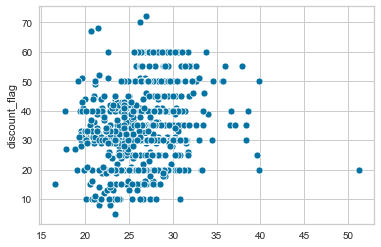

In [105]:
sns.scatterplot(y_test_pred2**3,y_2);

In [106]:
comp2[comp2['diff']<0].shape

(360, 3)

# Ridge Prediction

In [107]:
model3=Ridge(alpha=10).fit(X2,y**(1/4))

In [108]:
y_test_pred3=model3.predict(X2_2)
y_test_pred3

array([2.42437635, 2.25212719, 2.07103519, ..., 2.18455051, 2.12963183,
       2.09681172])

In [109]:
model3.score(X2,(y**(1/4)))

0.8173307611153731

In [110]:
comp3=pd.DataFrame(y_test_pred3**4,y_2).reset_index()
comp3['diff']=comp3.discount_flag-comp3[0]

In [111]:
comp3.describe()

,discount_flag,0,diff
count,1190.000000,1190.000000,1190.000000
mean,32.332773,25.340509,6.992264
std,11.400877,3.140653,11.160077
min,5.000000,16.332787,-30.104634
25%,25.000000,23.456409,-1.318537
50%,30.000000,25.556149,5.545611
75%,40.000000,26.949266,13.674609
max,72.000000,50.104634,47.508463


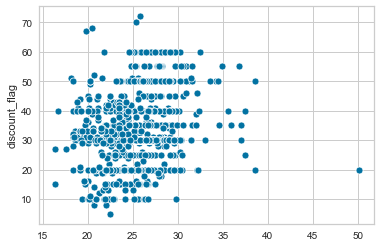

In [112]:
sns.scatterplot(y_test_pred3**4,y_2);

In [113]:
comp3[comp3['diff']<-2].shape

(274, 3)

In [114]:
comp3[comp3['diff']<0].shape

(331, 3)

In [115]:
comp3[comp3['diff']<-5].shape

(179, 3)